In [1]:
import os
import numpy as np 
import pandas as pd 

from glob import glob
from skimage.io import imread

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from skimage.morphology import label # label regions
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cut_off = 0.5):
    lab_img = label(x>cut_off)
    if lab_img.max()<1:
        print('blank image')
        lab_img[0,0] = 1 # ensure at least one prediction per image
    for i in range(1, lab_img.max()+1):
        yield rle_encoding(lab_img==i)

In [3]:
mo_test_images = glob(os.path.join('..', 'TestingResults-MO', '*'))
mo_test_images.sort()
mo_test_images[0]

'..\\TestingResults-MO\\0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5.png'

In [4]:
mo_test_images[0].split('\\')[-1].split('.')[0]

'0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5'

In [5]:
mo_test_image_ids = []
for image in mo_test_images:
    image_id = image.split('\\')[-1].split('.')[0]
    mo_test_image_ids.append(image_id)
mo_test_image_ids = set(mo_test_image_ids)

In [6]:
current_sub = pd.read_csv(os.path.join('..', 'submission', 'sub-dsbowl2018-0.354.csv'))
current_sub.columns

Index(['ImageId', 'EncodedPixels'], dtype='object')

In [7]:
all_test_image_ids = set(current_sub['ImageId'].unique())

In [8]:
other_test_image_ids = set(current_sub['ImageId'].unique()).difference(mo_test_image_ids)

In [9]:
print(len(mo_test_image_ids) + len(other_test_image_ids) == len(current_sub['ImageId'].unique()))

True


In [10]:
current_sub['MO'] = current_sub['ImageId'].map(lambda x: x in mo_test_image_ids)

### blank submission

In [11]:
blank_sub = pd.DataFrame(columns=['ImageId', 'EncodedPixels'])
blank_sub['ImageId'] = sorted(list(all_test_image_ids))
blank_sub['EncodedPixels'] = [[] for _ in list(all_test_image_ids)]
blank_sub.to_csv('../output/blank-sub.csv', index = False)

### MO submission

In [12]:
mo_sub = pd.DataFrame(columns=['ImageId', 'EncodedPixels'])

In [13]:
img0 = imread(mo_test_images[0])

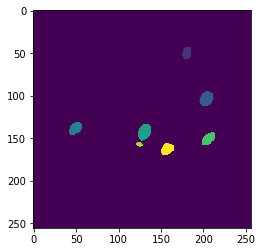

In [14]:
plt.imshow(img0)

In [15]:
len(list(prob_to_rles(img0)))

7

In [16]:
mo_ids, mo_pixels = [], []
for image in mo_test_images:
    image_id = image.split('\\')[-1].split('.')[0]
    img = imread(image)
    pixels = list(prob_to_rles(img))
    ids = [image_id]*len(pixels)
    mo_ids.extend(ids)
    mo_pixels.extend(pixels)
len(mo_ids), len(mo_pixels)

(1188, 1188)

In [17]:
mo_sub['ImageId'] = mo_ids
mo_sub['EncodedPixels'] = mo_pixels

In [18]:
other_empty = pd.DataFrame(columns=['ImageId', 'EncodedPixels'])
other_empty['ImageId'] = sorted(list(other_test_image_ids))
other_empty['EncodedPixels'] = [[] for _ in list(other_test_image_ids)]
mo_sub_0 = mo_sub.append(other_empty)
mo_sub_0.to_csv('../output/mo-sub-0.csv', index = False)

In [19]:
mo_current_sub = current_sub[current_sub['MO'] == True]
del mo_current_sub['MO']
mo_current_sub = mo_current_sub.append(other_empty)
mo_current_sub.to_csv('../output/mo-cur-sub-0.csv', index = False)

In [20]:
other_sub = current_sub[current_sub['MO'] == False]
del other_sub['MO']
mo_sub_1 = mo_sub.append(other_sub)
mo_sub_1.to_csv('../output/mo-sub-1.csv', index = False)

In [23]:
len(mo_sub_0), len(mo_sub_1), len(mo_current_sub), len(current_sub)

(1215, 2135, 1544, 2464)

In [24]:
len(mo_current_sub)

1544

In [25]:
65-38

27

In [26]:
len(other_empty)

27

In [27]:
0.253/38*65

0.43276315789473685

In [28]:
0.197/38*65

0.3369736842105263